In [ ]:
###### Load model ############

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataloader

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.model_selection import train_test_split
from pathlib import Path
import torchvision
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import random
import cv2

import pandas as pd
import shutil

In [ ]:
class MyDataset(Dataset):
    def __init__(self, images_folder, masks_folder,
                 img_transform=None, masks_transform=None):
        super(Dataset, self).__init__()
        
        self.images_folder = images_folder
        self.masks_folder = masks_folder

        self.images_names = np.sort(os.listdir(images_folder))
        self.masks_names = np.sort(os.listdir(masks_folder))
        
        self.img_transform = img_transform
        self.masks_transform = masks_transform

    def __len__(self):
        return len(self.images_names)
    
    def __getitem__(self, idx):
        item_image = Image.open(os.path.join(self.images_folder,
                                            self.images_names[idx])).convert('RGB')
        item_mask = Image.open(os.path.join(self.masks_folder,
                                              self.masks_names[idx])).convert('RGB')
        
        SEED = np.random.randint(123456789)
        if self.img_transform is not None:
            random.seed(SEED)
            item_image = self.img_transform(item_image)
        if self.masks_transform is not None:  
            random.seed(SEED)
            item_mask = self.masks_transform(item_mask)

        return item_image, item_mask

In [ ]:
# for Lungs dataset
#### if you want to choose other dataset, please use appropriate path

prefix_dataset_normal = '/content/drive/MyDrive/ML_project/dataset_med_noise_0'

In [ ]:
trans = transforms.Compose([
    transforms.ToTensor(),
])

# train_set = MyDataset(images_folder = prefix_dataset_normal + '/train/images/', 
#                       masks_folder = prefix_dataset_noise + '/train/masks',
#                       img_transform = trans, masks_transform = trans)


val_set = MyDataset(images_folder = prefix_dataset_normal + '/val/images/', 
                      masks_folder = prefix_dataset_normal + '/val/masks',
                      img_transform = trans, masks_transform = trans)

In [ ]:
print(len(val_set.images_names))
print(len(val_set.masks_names))

81
81


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
#### BATCH######
import math
import helper
from helper import plot_side_by_side
import torchvision.utils

def reverse_transform(inp):
    inp = inp.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    inp = (inp * 255).astype(np.uint8)
    
    return inp

  

val_batch = torch.utils.data.DataLoader(val_set,
                                            batch_size=5,
                                            shuffle=True)

inputs, labels = next(iter(val_batch))
inputs = inputs.to(device)
labels = labels.to(device)

In [ ]:
cd /content/drive/MyDrive/ML_project

/content/drive/MyDrive/ML_project


In [ ]:
### If you don't have geffnet please install it:
# ! pip install geffnet

In [ ]:
# load model from saving
import torch
prefix = './'
model_name = 'Unet'
regime = 'none'
coef_noise = 0.8
lam = 1

model_new = torch.load(prefix + "model_" + model_name + '_' + regime + '_superloss_' + str(coef_noise) + \
                                              '_lam_' + str(lam) + ".pth")


### Pictures for Unet

(5, 3, 512, 512)


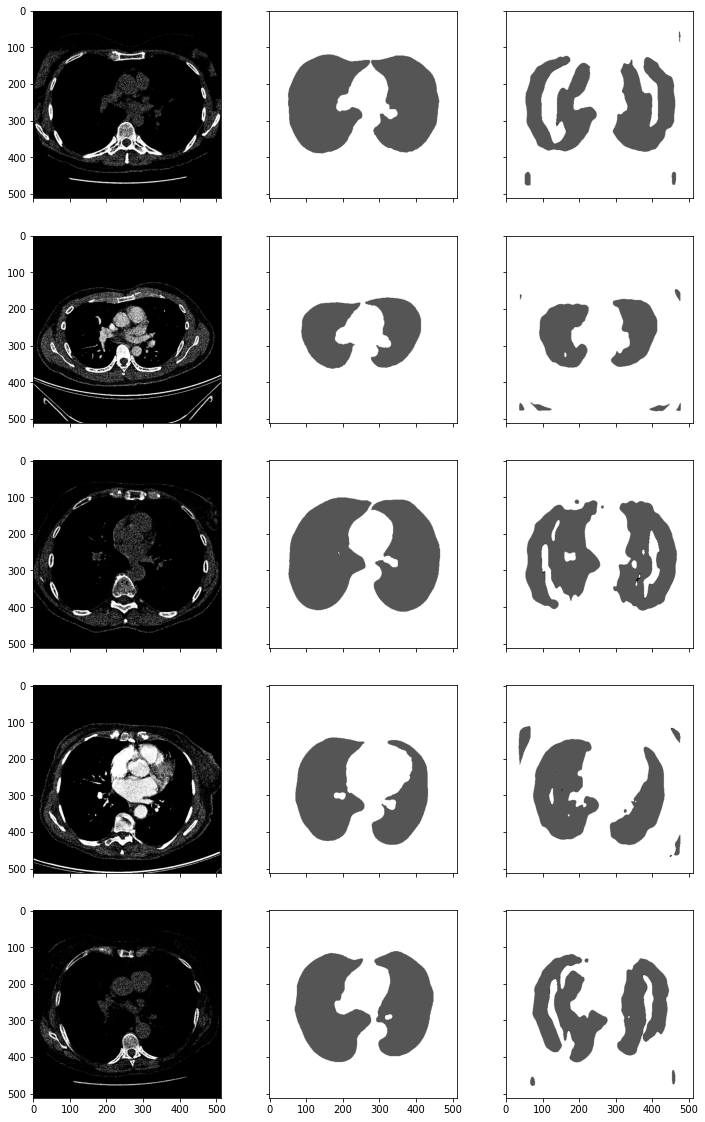

In [ ]:
model_new.eval()         


pred = model_new(inputs)

pred = pred.data.cpu().numpy()
print(pred.shape)

input_images_rgb = [reverse_transform(x) for x in inputs.cpu()]

target_masks_rgb = [helper.masks_to_colorimg(x) for x in labels.cpu().numpy()]
pred_rgb = [helper.masks_to_colorimg(x) for x in pred]

plot_side_by_side([input_images_rgb, target_masks_rgb, pred_rgb])




### Pictures for MiDaS

#### If you want see MiDaS model results, you should change path and use next code for visualization

In [ ]:
import math
import cv2

model_new.eval()   # Set model to evaluate mode

val_batch = torch.utils.data.DataLoader(val_set,
                                            batch_size=4,
                                            shuffle=True)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")        
inputs, labels = next(iter(val_batch))
inputs = inputs.to(device)
labels = labels.to(device)

pred = model_new(inputs)
pred = pred.unsqueeze(1)

# pred = pred.data.cpu().numpy()


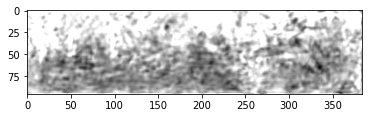

In [ ]:
plt.imshow(pred.data.cpu().numpy()[2][0], cmap="binary")

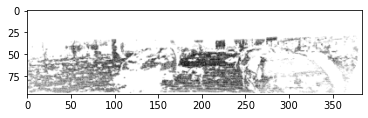

In [ ]:
plt.imshow(labels.data.cpu().numpy()[2][0], cmap="binary")